# Comparing Growth Rate in States of Both Countries

The equation for exponential growth is characterized by : 

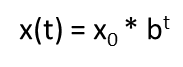

**x(t)** is the number of Covid cases at time t

**b** is the growth factor we are determining. It gives an indication of how fast cases grow

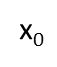is the number of cases at the beginning day of calculation(also called initial value)

**b** can be calculated  by taking the logarithm of the given expression.

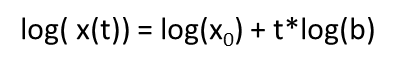

The above equation is similar to linear equation:

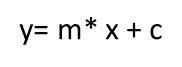

So we can use Linear Regression model to find out **b** which is similar to finding out coefficient of **m** of **x**

**Reference:** https://towardsdatascience.com/modeling-exponential-growth-49a2b6f22e1f

In [ ]:
#contain the daily COVID new case numbers in case of India
import numpy as np
import pandas as pd
c=pd.read_csv('state_wise_daily.csv',parse_dates=[0])

In [ ]:
c_c=c.copy()

In [ ]:
c.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,2020-03-14,Confirmed,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0.0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0
1,2020-03-14,Recovered,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0
2,2020-03-14,Deceased,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-15,Confirmed,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0.0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0
4,2020-03-15,Recovered,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0


In [ ]:
#c.drop('Unnamed: 39',axis=1,inplace=True)

In [ ]:
# TT represents total number of infection in all states for that particular day. Since we are analyzing state-wise data we don't need this column.
c.drop('TT',axis=1,inplace=True)

In [ ]:
# Choosing the number of confirmed cases in each state
c_confirmed=c[c['Status']=='Confirmed']

In [ ]:
c_confirmed.drop('Status',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# After inspection it was found that only one missing value was there in a particular state, and the values for the next few days are still 0 so there 
# thr infection haven't began yet, so it is filled with 0.
c_confirmed.fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# the data records the number of new cases in a particular day. It is converted to time-series data for analysis by taking the cumulative sum of cases
c_confirmed=c_confirmed.drop('Date',axis=1).cumsum()

In [ ]:
c_confirmed.head()

,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0.0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0
3,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,24,0,0,0.0,32,0,0,0,0,0,0,1,4,0,1,3,0,13,0,0
6,0,1,0,0,0,0,0,0,0,7,0,0,14,0,3,0,7,27,0,0,0.0,38,0,0,0,0,1,1,1,4,0,1,4,0,13,1,0
9,0,1,0,0,0,0,0,0,0,8,0,0,15,0,3,0,9,27,0,0,0.0,41,0,0,0,0,1,1,1,4,0,1,5,0,15,1,1
12,0,1,0,0,0,0,0,0,0,10,0,0,16,0,4,0,14,27,8,0,0.0,44,0,0,0,0,2,1,2,7,0,2,13,0,17,2,1


In [ ]:
c_confirmed['Date']=c_c['Date']

In [ ]:
c_confirmed.isnull().sum()

AN      0
AP      0
AR      0
AS      0
BR      0
CH      0
CT      0
DN      0
DD      0
DL      0
GA      0
GJ      0
HR      0
HP      0
JK      0
JH      0
KA      0
KL      0
LA      0
LD      0
MP      0
MH      0
MN      0
ML      0
MZ      0
NL      0
OR      0
PY      0
PB      0
RJ      0
SK      0
TN      0
TG      0
TR      0
UP      0
UT      0
WB      0
Date    0
dtype: int64

In [ ]:
# reshaping the dataframe for ease of analysis and plotting
c2=pd.melt(frame=c_confirmed,id_vars='Date')
c2.rename(columns={'value':'confirmed_cases','variable':'state_code'},inplace=True)
c2.head()

,Date,state_code,confirmed_cases
0,2020-03-14,AN,0.0
1,2020-03-15,AN,0.0
2,2020-03-16,AN,0.0
3,2020-03-17,AN,0.0
4,2020-03-18,AN,0.0


In [ ]:
import plotly.express as px
fig = px.line(c2,  y="confirmed_cases",color='state_code',x='Date')
fig.show()

**Using Plotly Express library we created line plot above for every state of India. We can see that almost all states have an exponential growth curve.** The advantage of Plotly is that it is interactive, you can hover on a particular line to see all the details regarding to see all the details related to it. Also you can see the plot of any state of your choice individually and the axis will get automatically adjusted. There are many more exciting features of plotly.

In [ ]:
# calculating number of days since the first infection seen
c2['day']=c2['Date']-pd.to_datetime('2020-03-13')
c2['day1']=(c2['day']/ np.timedelta64(1, 'D')).astype(int)

In [ ]:
c2[c2['state_code']=='MH']

,Date,state_code,confirmed_cases,day,day1
987,2020-03-14,MH,14.0,1 days,1
988,2020-03-15,MH,32.0,2 days,2
989,2020-03-16,MH,38.0,3 days,3
990,2020-03-17,MH,41.0,4 days,4
991,2020-03-18,MH,44.0,5 days,5
992,2020-03-19,MH,48.0,6 days,6
993,2020-03-20,MH,52.0,7 days,7
994,2020-03-21,MH,64.0,8 days,8
995,2020-03-22,MH,74.0,9 days,9
996,2020-03-23,MH,97.0,10 days,10


In [ ]:
c2.groupby('state_code')['confirmed_cases'].max()

state_code
AN      33.0
AP    1332.0
AR       1.0
AS      38.0
BR     403.0
CH      68.0
CT      38.0
DD       0.0
DL    3439.0
DN       0.0
GA       7.0
GJ    4082.0
HP      40.0
HR     311.0
JH     107.0
JK     581.0
KA     535.0
KL     496.0
LA      22.0
LD       0.0
MH    9915.0
ML      12.0
MN       2.0
MP    2560.0
MZ       1.0
NL       0.0
OR     125.0
PB     375.0
PY       8.0
RJ    2438.0
SK       0.0
TG    1016.0
TN    2162.0
TR       2.0
UP    2134.0
UT      55.0
WB     725.0
Name: confirmed_cases, dtype: float64

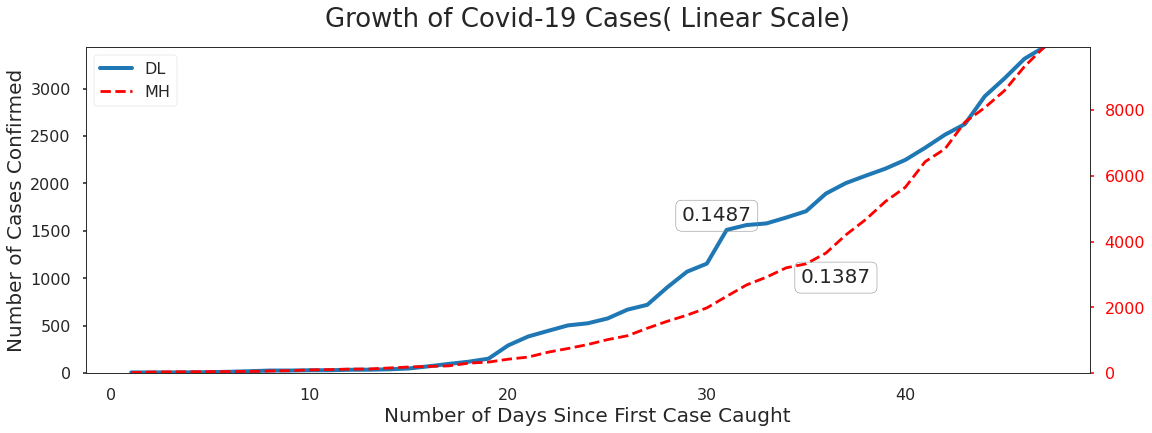

In [ ]:
#plotting the time series graph for two random states in India. Note two y-axis are taken each spreading from 0 to their maximum value, to compare the 
# slope of one graph with another. Otherwise if we take only one axis then the true slope and true shape of one graph would be completely overshadowed or distorted
# due to high difference of their values.
c3=c2[c2['state_code']=='DL']
c4=c2[c2['state_code']=='MH']
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
l1=ax.plot(c3['day1'],c3['confirmed_cases'],linewidth=4,label='DL')
ax.set_ylim(0,3439)
# The growth-rate '0.1487' of curve is obtain from later section
ax.annotate('0.1487',xy=(30,1707.1),fontsize=20,bbox=dict(boxstyle='round',fc='none',ec='gray'),xytext=(10,-10),textcoords='offset points',ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3,angleA=0,angleB=90'))
ax2 = ax.twinx()
l2=ax2.plot(c4['day1'],c4['confirmed_cases'],c='red',linestyle='--',label='MH')
gg1=ax.set_ylabel('Number of Cases Confirmed',fontsize=20)
gg2=ax.set_xlabel('Number of Days Since First Case Caught',fontsize=20)
plt.title('Growth of Covid-19 Cases( Linear Scale)',fontsize=26)
ax2.annotate('0.1387',xy=(36,3648.1),fontsize=20,bbox=dict(boxstyle='round',fc='none',ec='gray'),xytext=(10,-30),textcoords='offset points',ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3,angleA=0,angleB=90'))
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim(0,9915)
su=l1+l2
labs = [l.get_label() for l in su]
g5=ax.legend(su, labs, loc='upper left')

In [ ]:
list1=c2.state_code.unique().tolist()

In [ ]:
# Getting the growth rate of curves for each state by using the concept demonstrated above.

# Log of 0 is invalid so here we add 0.1
c2['confirmed_cases']=c2['confirmed_cases']+0.1

# Python statsmodels API will help us to find out the growth-factor easily
import statsmodels.api as sm
d=dict()
for i in list1:
  c3=c2[c2['state_code']==i]
  y=np.log(c3['confirmed_cases'])

  X=c3['day1']
  X1=sm.add_constant(X)
  model=sm.OLS(y,X1)
  res=model.fit()
  d[i]=res.params[1]
print(d)

{'AN': 0.13846568135228982, 'AP': 0.1664711566586204, 'AR': 0.07375579816886756, 'AS': 0.17637994958700362, 'BR': 0.17688091671083947, 'CH': 0.10071196581478464, 'CT': 0.123346918531444, 'DN': 3.469446951953614e-18, 'DD': 3.469446951953614e-18, 'DL': 0.14873274175656806, 'GA': 0.102821086178267, 'GJ': 0.20698284902781316, 'HR': 0.07870610067400277, 'HP': 0.130021560330558, 'JK': 0.13302744480613302, 'JH': 0.19221348979261912, 'KA': 0.09409484204781601, 'KL': 0.06456944307361798, 'LA': 0.062496478566970666, 'LD': 3.469446951953614e-18, 'MP': 0.21897645331893334, 'MH': 0.13871564172723944, 'MN': 0.07118564423424635, 'ML': 0.1356166117912147, 'MZ': 0.05490093247156306, 'NL': 3.469446951953614e-18, 'OR': 0.13124168636922134, 'PY': 0.07098944536015864, 'PB': 0.11824735521591874, 'RJ': 0.14839405691691357, 'SK': 3.469446951953614e-18, 'TN': 0.1752506951060862, 'TG': 0.12698967971380004, 'TR': 0.09671697847156734, 'UP': 0.12272215537242356, 'UT': 0.10164980734971478, 'WB': 0.16685593042354804

In [ ]:
# Positive Covid-case report for USA states
us_case=pd.read_csv('us_states_covid19_daily.csv',parse_dates=['date'])
us_c=us_case.copy()

In [ ]:
us_c.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-29,AK,355.0,18764.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,240.0,1f164fdcaff1515f7d932661d55c2befc47d1d56,2020-04-29T20:00:00Z,9.0,NaN,19119.0,19119.0,19119.0,2,0.0,0.0,2026.0,4.0,2030.0
1,2020-04-29,AL,6842.0,73607.0,NaN,NaN,945.0,NaN,335.0,NaN,195.0,NaN,64ed895334be8e81ee542c66073a35a9e476e673,2020-04-29T20:00:00Z,245.0,945.0,80449.0,80449.0,80449.0,1,3.0,34.0,4467.0,155.0,4622.0
2,2020-04-29,AR,3192.0,42257.0,NaN,93.0,389.0,NaN,NaN,18.0,82.0,1249.0,9827fcec07de693367e6146e20eafb073bc69b3c,2020-04-29T20:00:00Z,59.0,389.0,45449.0,45449.0,45449.0,5,7.0,389.0,4697.0,81.0,4778.0
3,2020-04-29,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0b09af6fe54759d2ebe74bd76d6adc8ebd1acaf,2020-04-29T20:00:00Z,0.0,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-29,AZ,7202.0,61611.0,NaN,756.0,1131.0,312.0,NaN,191.0,NaN,1475.0,4e256d208ebc38ef89648f5a514a21008cfc35f3,2020-04-29T20:00:00Z,304.0,1131.0,68813.0,68813.0,68813.0,4,11.0,36.0,1121.0,254.0,1375.0


In [ ]:
us_c=us_c[::-1]

In [ ]:
us_c[us_c['state']=='AZ']

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
3034,2020-03-04,AZ,2.0,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f9b5336be00388e0549a6e35cfbe7ec911597df2,2020-03-04T21:00:00Z,NaN,NaN,34.0,29.0,29.0,4,NaN,NaN,NaN,NaN,NaN
3010,2020-03-05,AZ,2.0,28.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3e94b739062d1c0306f5279361451cd382171ccf,2020-03-05T21:00:00Z,NaN,NaN,36.0,30.0,30.0,4,0.0,0.0,1.0,0.0,1.0
2976,2020-03-06,AZ,3.0,33.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bcfcf56b97c3f10a640d25f6148abbc1f17fa07d,2020-03-06T21:00:00Z,NaN,NaN,51.0,36.0,36.0,4,0.0,0.0,5.0,1.0,6.0
2927,2020-03-07,AZ,5.0,44.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0c334b56af3108711bb907f46599a84bd536ac1d,2020-03-07T21:00:00Z,NaN,NaN,56.0,49.0,49.0,4,0.0,0.0,11.0,2.0,13.0
2877,2020-03-08,AZ,5.0,44.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7fab3faf304af2d21cf805b897dbe16c6cf1a5c6,2020-03-08T20:00:00Z,NaN,NaN,56.0,49.0,49.0,4,0.0,0.0,0.0,0.0,0.0
2827,2020-03-09,AZ,5.0,44.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34a29bfcfa1a71c92fe460039d78f6bb8bf65e60,2020-03-09T20:00:00Z,NaN,NaN,56.0,49.0,49.0,4,0.0,0.0,0.0,0.0,0.0
2777,2020-03-10,AZ,6.0,51.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5dcc8301933ff5a560e3f87228a47f11150d6833,2020-03-10T20:00:00Z,NaN,NaN,84.0,57.0,57.0,4,0.0,0.0,7.0,1.0,8.0
2727,2020-03-11,AZ,9.0,59.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc3cab43e403773ab7bee5f42d8dd1ccc405c3d5,2020-03-11T20:00:00Z,NaN,NaN,100.0,68.0,68.0,4,0.0,0.0,8.0,3.0,11.0
2676,2020-03-12,AZ,9.0,82.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542a30820399e2d4ec7a2787e6760577326f402d,2020-03-12T20:00:00Z,NaN,NaN,115.0,91.0,91.0,4,0.0,0.0,23.0,0.0,23.0
2625,2020-03-13,AZ,9.0,94.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68c52c41afcca5a93045251c1a7e05b086b85767,2020-03-13T20:00:00Z,0.0,NaN,143.0,103.0,103.0,4,0.0,0.0,12.0,0.0,12.0


In [ ]:
us_c=us_c[['date','state','positive']]

In [ ]:
us_c.isnull().sum()

date         0
state        0
positive    15
dtype: int64

In [ ]:
us_c.fillna(0,inplace=True)

In [ ]:
print(min(us_c['date']), max(us_c['date']))

2020-01-22 00:00:00 2020-04-29 00:00:00


In [ ]:
#Calculating number of days since the first case observed
us_c['day']=us_c['date']-pd.to_datetime('2020-01-21')
us_c['day1']=(us_c['day']/ np.timedelta64(1, 'D')).astype(int)

In [ ]:
us_c.head()

,date,state,positive,day,day1
3096,2020-01-22,WA,1.0,1 days,1
3095,2020-01-23,WA,1.0,2 days,2
3094,2020-01-24,WA,1.0,3 days,3
3093,2020-01-25,WA,1.0,4 days,4
3092,2020-01-26,WA,1.0,5 days,5


In [ ]:
import plotly.express as px
fig = px.line(us_c,  y="positive",x='date',color='state')
fig.show()

**Using Plotly Express library we created line plot above for every state of USA. We can see that almost all states have an more or less exponential growth curve. The advantage of Plotly is that it is interactive, you can hover on a particul**ar line to see all the details regarding to see all the details related to it. Also you can see the plot of any state of your choice individually and the axis will get automatically adjusted. There are many more exciting features of plotly.

In [ ]:
# calculating the growth rate of cases for US states
list2=us_c.state.unique().tolist()
# log of 0 is invalid
us_c['positive']=us_c['positive']+0.1

import statsmodels.api as sm
d1=dict()
for i in list2:
  c3=us_c[us_c['state']==i]
  y=np.log(c3['positive'])

  X=c3['day1']
  X1=sm.add_constant(X)
  model=sm.OLS(y,X1)
  res=model.fit()
  d1[i]=res.params[1]
print(d1)

{'WA': 0.12902747097681394, 'RI': 0.16338225657201283, 'MI': 0.11608118419849911, 'WI': 0.15681374502553422, 'TX': 0.17149501437262255, 'SC': 0.16670588196237765, 'OR': 0.11557500787135391, 'NY': 0.16726381430184195, 'NH': 0.1327904341792734, 'NC': 0.16221808175396796, 'IL': 0.17328331775370132, 'GA': 0.163197774078121, 'FL': 0.1601289898911654, 'CA': 0.1282865822382868, 'AZ': 0.1548487252059561, 'VA': 0.1786550372167952, 'TN': 0.15591770517680859, 'OH': 0.19330499126100126, 'NV': 0.15488352631320837, 'NJ': 0.19485097216617553, 'NE': 0.14910700505453126, 'MD': 0.17703596486913148, 'DC': 0.16568056271764436, 'CO': 0.1484035221579451, 'WV': 0.20448676440825908, 'VT': 0.14377573313055167, 'PA': 0.1768876659767153, 'NM': 0.16849293165304371, 'MN': 0.14148271568637422, 'KY': 0.15210350634473935, 'KS': 0.1641530429374773, 'IN': 0.17639697206640167, 'IA': 0.16211389017381633, 'DE': 0.1849356553927637, 'AR': 0.1695871733330241, 'AK': 0.15622595181798202, 'WY': 0.14146405719593363, 'UT': 0.1472

In [ ]:
us_cc=[i for i in d1.values()]
ind_c=[i for i in d.values()]

# For the aim of seeing comparing the growth rates of cases for Indian and USA states, we are calculating the 5-point summary of the growth rates obtained for each countries
min1=np.quantile(us_cc,0).round(4)
q1=np.quantile(us_cc,0.25).round(4)
q2=np.quantile(us_cc,0.50).round(4)
q3=np.quantile(us_cc,0.75).round(4)
min2=np.quantile(us_cc,1).round(4)

u1=np.quantile(ind_c,0).round(4)
u2=np.quantile(ind_c,0.25).round(4)
u3=np.quantile(ind_c,0.50).round(4)
u4=np.quantile(ind_c,0.75).round(4)
u5=np.quantile(ind_c,1).round(4)

In [ ]:
print(min1,u1)
print(min2,u5)

0.0 0.0
0.2045 0.219


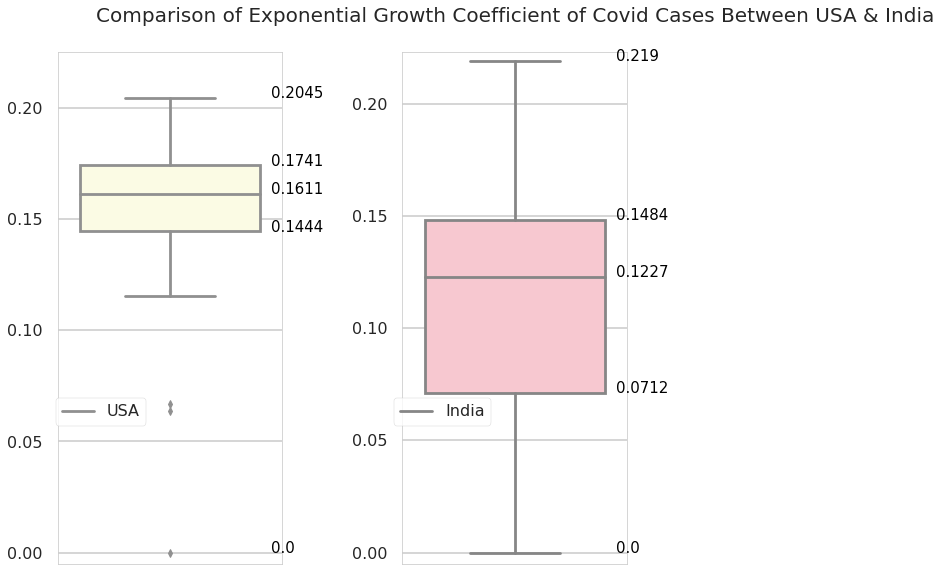

In [ ]:
# Plotting the boxplots of growth-rates of both countries to compare the rate of cases of growth. Note that the y-axis in both boxplots are exactly same.

import seaborn as sns
from matplotlib import rcParams
rcParams['axes.titlepad'] = 30 
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
plt.subplot(1,2,1)
g=sns.boxplot(y=us_cc,color='lightyellow')
for i, v in enumerate([min1,q1,q2,q3,min2]):
    plt.text( 0.45,v-0.000053, str(v), color='black',fontsize=15)
plt.ylim((-0.005,0.225))
plt.legend(loc='best',labels=['USA'],bbox_to_anchor=(0.09, 0.,0.34,0.34))
plt.subplot(1,2,2)
g=sns.boxplot(y=ind_c,color='pink')
#plt.boxplot(ind['bed/person'])
for i, v in enumerate([u1,u2,u3,u4,u5]):
    plt.text( 0.45,v-0.000053, str(v), color='black',fontsize=15)
plt.ylim((-0.005,0.223))
plt.tight_layout(pad=3.0)
gg=plt.title('Comparison of Exponential Growth Coefficient of Covid Cases Between USA & India',fontsize=20)
ggg=plt.legend(loc='best',labels=['India'],bbox_to_anchor=(0.09, 0.,0.34,0.34))

# Comparing the Mobility Rate of Citizens of Both Countries during Pandemic

This section is for checking **how much the citizens move(mobility rate)** during the pandemic. Lesser the people go out of their houses, the lesser will be chances of infection. 

In [ ]:
mobil=pd.read_csv('Global_Mobility_Report (1).csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
mobil.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [ ]:
# Getting the data for respective countries in concern
mobil1=mobil[mobil.country_region_code.isin(['US','IN'])]
mobil1=mobil1[['country_region','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']]

In [ ]:
mobil1.columns

Index(['country_region', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [ ]:
# Renaming the columns for better understanding
mobil1.rename(columns={'retail_and_recreation_percent_change_from_baseline':'retail & recreation','grocery_and_pharmacy_percent_change_from_baseline':'grocery & pharmacy'},inplace=True)

In [ ]:
# Same as previous cell
mobil1.rename(columns={'parks_percent_change_from_baseline':'parks','transit_stations_percent_change_from_baseline':'transit stations','workplaces_percent_change_from_baseline':'workplace','residential_percent_change_from_baseline':'residential'},inplace=True)

In [ ]:
# Reshaping the dataframe for plotting
mobil2=pd.melt(frame=mobil1,id_vars='country_region',value_vars=['retail & recreation', 'grocery & pharmacy', 'parks',
       'transit stations', 'workplace', 'residential'])
mobil2.head()

,country_region,variable,value
0,India,retail & recreation,1.0
1,India,retail & recreation,2.0
2,India,retail & recreation,-1.0
3,India,retail & recreation,0.0
4,India,retail & recreation,0.0


In [ ]:
# Renaming the columns of reshaped dataframe
mobil2.rename(columns={'variable':'category','value':'change'},inplace=True)

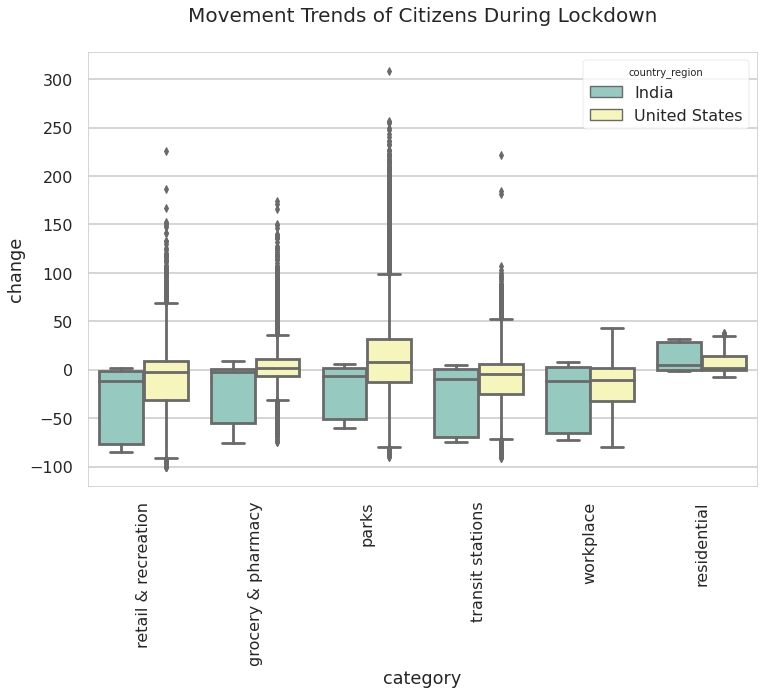

In [ ]:
# Plotting multiple boxplot to compare the mobility rate
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="category", y="change", hue="country_region",
                 data=mobil2, palette="Set3")
ax1=plt.xticks(rotation=90)
gg4=plt.title('Movement Trends of Citizens During Lockdown',fontsize=20)

# Comparing the Adequacy of Tests in Both Countries

In [ ]:
import pandas as pd
c=pd.read_csv('covid-19-total-confirmed-cases-vs-total-tests-conducted (1).csv',parse_dates=['Date'])
c.head()


,Entity,Code,Date,Total tests (tests),Total confirmed cases of COVID-19 (cases)
0,Afghanistan,AFG,2020-02-25,NaN,1.0
1,Afghanistan,AFG,2020-02-26,NaN,1.0
2,Afghanistan,AFG,2020-02-27,NaN,1.0
3,Afghanistan,AFG,2020-02-28,NaN,1.0
4,Afghanistan,AFG,2020-02-29,NaN,1.0


In [ ]:
# Calculating number of days since first case seen
import numpy as np
c['day']=c['Date']-pd.to_datetime('2020-03-06')
c['day1']=c['day']/ np.timedelta64(1, 'D').astype(int)

In [ ]:
# Missing values are dropped as they don't give information on numner of tests
c10=c[c['Code']=='USA'].dropna()
c10.head()

,Entity,Code,Date,Total tests (tests),Total confirmed cases of COVID-19 (cases),day,day1
11978,United States,USA,2020-03-07,3753.0,338.0,1 days,1 days
11979,United States,USA,2020-03-08,4624.0,433.0,2 days,2 days
11980,United States,USA,2020-03-09,6420.0,554.0,3 days,3 days
11981,United States,USA,2020-03-10,8832.0,754.0,4 days,4 days
11982,United States,USA,2020-03-11,12580.0,1025.0,5 days,5 days


In [ ]:
c10['day']=c10['day'].astype('str').str.split(' ').str.get(0)

In [ ]:
# Viewing the ultimate dataframe
c10

,Entity,Code,Date,Total tests (tests),Total confirmed cases of COVID-19 (cases),day,day1
11978,United States,USA,2020-03-07,3753.0,338.0,1,1 days
11979,United States,USA,2020-03-08,4624.0,433.0,2,2 days
11980,United States,USA,2020-03-09,6420.0,554.0,3,3 days
11981,United States,USA,2020-03-10,8832.0,754.0,4,4 days
11982,United States,USA,2020-03-11,12580.0,1025.0,5,5 days
11983,United States,USA,2020-03-12,17717.0,1312.0,6,6 days
11984,United States,USA,2020-03-13,26773.0,1663.0,7,7 days
11985,United States,USA,2020-03-14,31291.0,2174.0,8,8 days
11986,United States,USA,2020-03-15,38949.0,2951.0,9,9 days
11987,United States,USA,2020-03-16,56610.0,3774.0,10,10 days


Here we will compare the the curves of number of tests performed vs number of positive cases daily for each country. Here also we take **2 Y-axis** in same graph each extending from 0 to their respective maximum value to obtain the true curve shape and compare them effectively. If the **graph of number of tests for a particular day is above the number of positive cases** **graph** then we can conclude **adequate tests are being performed** to detect the cases whereas opposite denotes more tests needs to be performed. 


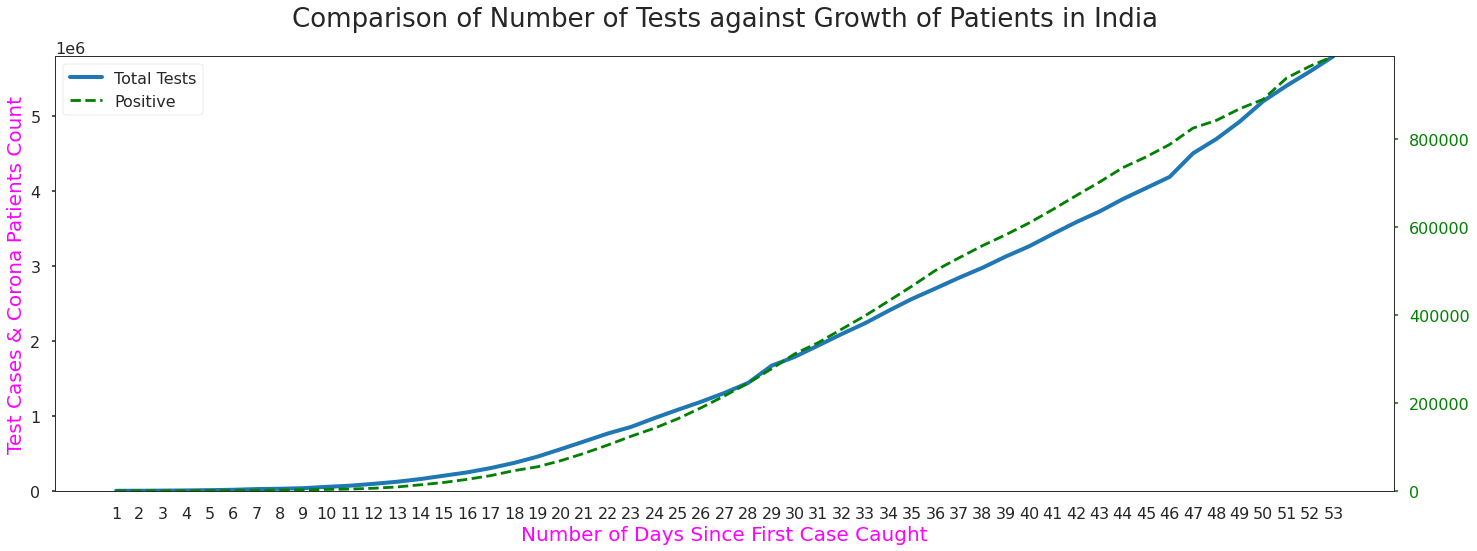

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.titlepad'] = 30 
import seaborn as sns
#plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(24,8))
sns.set_style('white')
ax7 = fig.add_subplot(111)
l1=ax7.plot(c10['day'],c10['Total tests (tests)'],linewidth=4,label='Total Tests')
ax7.set_ylim(0,5795728)
#ax.annotate('Adequate Tests', xy=('2012-9-4', 4850), xycoords='data', ha='center',
           # xytext=(0, -20), textcoords='offset points')
#ax.plot(time, Rn, '-', label = 'Rn')
ax8 = ax7.twinx()
l2=ax8.plot(c10['day'],c10['Total confirmed cases of COVID-19 (cases)'],c='green',linestyle='--',label='Positive')
#ax7.set_xticklabels([7,15,22,28,35,42,49,53])
#ax.set_ylim()
gg1=ax7.set_ylabel('Test Cases & Corona Patients Count',fontsize=20,color='magenta')
ax8.set_ylim(0,988451)
gg2=ax7.set_xlabel('Number of Days Since First Case Caught',fontsize=20,color='magenta')
plt.title('Comparison of Number of Tests against Growth of Patients in India',fontsize=26)
ax8.tick_params(axis='y', colors='green')
#l3=ax2.legend(loc='upper right')
su=l1+l2
labs = [l.get_label() for l in su]
g5=ax7.legend(su, labs, loc='upper left')

In [ ]:
# All the same procedure as above; this time for India
c10=c[c['Code']=='IND'].dropna()
c10['day']=c10['Date']-pd.to_datetime('2020-03-12')
c10['day1']=c10['day']/ np.timedelta64(1, 'D').astype(int)
#c10=c[c['Code']=='IND'].dropna()
c10.tail()

,Entity,Code,Date,Total tests (tests),Total confirmed cases of COVID-19 (cases),day,day1
5347,India,IND,2020-04-25,579957.0,24506.0,44 days,44 days
5348,India,IND,2020-04-26,625309.0,26496.0,45 days,45 days
5349,India,IND,2020-04-27,665819.0,27892.0,46 days,46 days
5350,India,IND,2020-04-28,716733.0,29435.0,47 days,47 days
5351,India,IND,2020-04-29,770764.0,31332.0,48 days,48 days


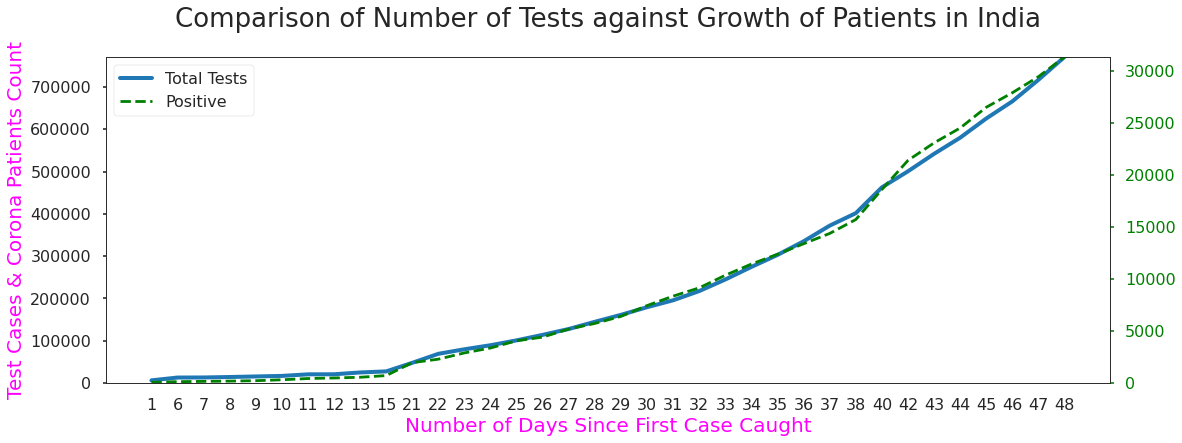

In [ ]:

c10['day']=c10['day'].astype('str').str.split(' ').str.get(0)
fig = plt.figure(figsize=(18,6))
sns.set_style('white')
ax = fig.add_subplot(111)
l1=ax.plot(c10['day'],c10['Total tests (tests)'],linewidth=4,label='Total Tests')
#ax.plot(time, Rn, '-', label = 'Rn')
ax.set_ylim(0,770764)
ax2 = ax.twinx()
l2=ax2.plot(c10['day'],c10['Total confirmed cases of COVID-19 (cases)'],c='green',linestyle='--',label='Positive')
#ax2.set_xticklabels([7,14,21,28,35,42,49,53])
ax2.set_ylim(0,31332)
gg1=ax.set_ylabel('Test Cases & Corona Patients Count',fontsize=20,color='magenta')
gg2=ax.set_xlabel('Number of Days Since First Case Caught',fontsize=20,color='magenta')
plt.title('Comparison of Number of Tests against Growth of Patients in India',fontsize=26)
ax2.tick_params(axis='y', colors='green')
su=l1+l2
labs = [l.get_label() for l in su]
g5=ax.legend(su, labs, loc='upper left')

# Comparing the Number of Physicians and Elderly People in Each Country

Here the number of physicians/doctors are indicative of **number of physicians per 1000 people in the country.**

Similarly elderly people are calculated as percentage of elderly people i.e, **number per 100.**

In [ ]:
age=pd.read_csv('share-of-the-population-that-is-70-years-and-older.csv')
phy=pd.read_csv('physicians-per-1000-people.csv')

In [ ]:
age.head()

,Entity,Code,Year,Share who is 70 or over (%)
0,Afghanistan,AFG,1950,1.391
1,Afghanistan,AFG,1951,1.434
2,Afghanistan,AFG,1952,1.461
3,Afghanistan,AFG,1953,1.469
4,Afghanistan,AFG,1954,1.456


In [ ]:
phy.head()

,Entity,Code,Year,"Physicians (per 1,000 people) (per 1,000 people)"
0,Afghanistan,AFG,1960,0.035
1,Afghanistan,AFG,1965,0.063
2,Afghanistan,AFG,1970,0.065
3,Afghanistan,AFG,1981,0.077
4,Afghanistan,AFG,1986,0.183


In [ ]:
# Extracting the latest data avaliable in the dataset for both countries
ag1=age[age.Code.isin(['USA','IND'])][age['Year']==2015]
phy1=phy1=phy[((phy['Year']==2016) & (phy['Code']=='IND')) |  ((phy['Year']==2014) & (phy['Code']=='USA'))]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
# Renaming the columns
ag1.rename(columns={'Share who is 70 or over (%)':'% Elder People'},inplace=True)
phy1.rename(columns={'Physicians (per 1,000 people) (per 1,000 people)':'Physicians/1000_People'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Merging and reshaping the dataframes to make them appropriate for plotting
ag_py=ag1.merge(phy1,on='Code')
ag_py=ag_py[['Entity_x','% Elder People','Physicians/1000_People']]
ag_py1=pd.melt(frame=ag_py,value_vars=['% Elder People','Physicians/1000_People'],id_vars=['Entity_x'])
ag_py1

,Entity_x,variable,value
0,India,% Elder People,3.414
1,United States,% Elder People,9.732
2,India,Physicians/1000_People,0.758
3,United States,Physicians/1000_People,2.568


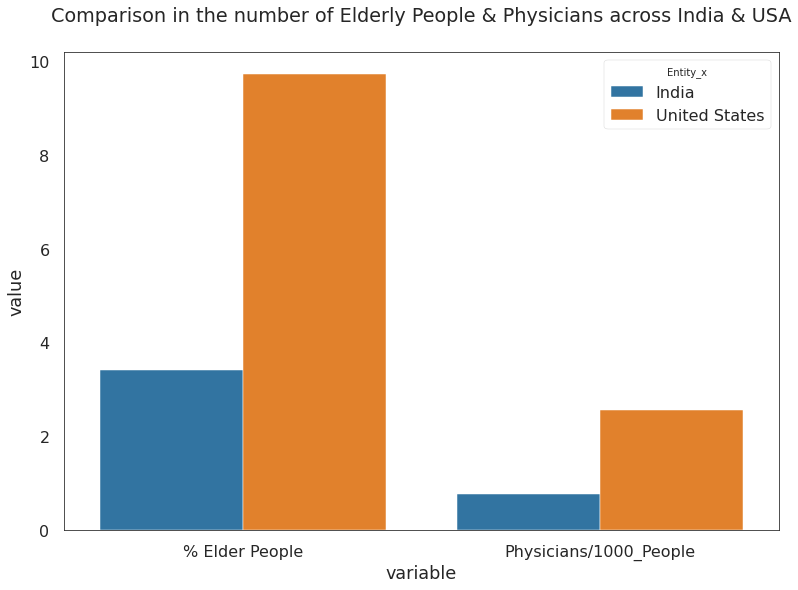

In [ ]:
# Barplot to compare the data between the two countries
ax = sns.barplot(x="variable", y="value", hue="Entity_x", data=ag_py1)
g=plt.title('Comparison in the number of Elderly People & Physicians across India & USA')

# Comparing Hospital Beds in Both Countries for Treatment of Covid Patients

Here we will see how much both the countries are eqipped with beds to accomodate growing number of Covid patients. 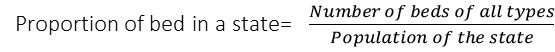

In [ ]:
ind_bed=pd.read_csv('HospitalBedsIndia (1).csv')
ind_pop=pd.read_csv('population_india_census2011.csv')
us_bed=pd.read_csv('us_healthcare.csv')
ind_pop.rename(columns={'State / Union Territory':'State/UT'},inplace=True)
ind_pop.drop('Sno',axis=1,inplace=True)
ind_bed.drop('Sno',axis=1,inplace=True)
ind=pd.merge(ind_pop, ind_bed, how='outer', on=['State/UT'])
ind.head(5)

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Uttar Pradesh,199812341.0,155317278.0,44495063.0,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912.0,3277,671.0,NaN,174.0,4122.0,58310.0,4442.0,39104.0,193.0,37156.0
1,Maharashtra,112374333.0,61556074.0,50818259.0,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929.0,2638,430.0,101.0,70.0,3239.0,68998.0,273.0,12398.0,438.0,39048.0
2,Bihar,104099452.0,92341436.0,11758016.0,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918.0,2007,63.0,33.0,43.0,2146.0,17796.0,930.0,6083.0,103.0,5936.0
3,West Bengal,91276115.0,62183113.0,29093002.0,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953.0,1374,406.0,70.0,55.0,1905.0,51163.0,1272.0,19684.0,294.0,58882.0
4,Madhya Pradesh,72626809.0,52557404.0,20069405.0,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931.0,1420,324.0,72.0,51.0,1867.0,38140.0,334.0,10020.0,117.0,18819.0


In [ ]:
# Population Data of few states were missing. SO they are filled taking information from Wikipedia.
ind.drop(index=41,inplace=True)
ind.iloc[36,1]=380581
ind.iloc[37,1]=343709
ind.iloc[38,1]=243247
ind.iloc[39,1]=12541302
ind.iloc[40,1]=35193978

In [ ]:
ind[['NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS','NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18','NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18']].fillna(0,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Taking into account all the different types of hospital bed available in both the countries
ind['bed/person']=np.sum(ind.iloc[:,7:],axis=1)/ind['Population']
us_bed['bed/person1']=(us_bed['Staffed All Beds']+us_bed['Staffed ICU Beds'])/us_bed['Population']

In [ ]:
# Calculating 5-point summary of proportion of beds in two countries
min1=ind['bed/person'].quantile(0).round(4)
q1=ind['bed/person'].quantile(.25).round(4)
q2=ind['bed/person'].quantile(.50).round(4)
q3=ind['bed/person'].quantile(.75).round(4)
min2=ind['bed/person'].quantile(1).round(4)

In [ ]:
u1=us_bed['bed/person1'].quantile(0).round(4)
u2=us_bed['bed/person1'].quantile(.25).round(4)
u3=us_bed['bed/person1'].quantile(.50).round(4)
u4=us_bed['bed/person1'].quantile(.75).round(4)
u5=us_bed['bed/person1'].quantile(1).round(4)

In [ ]:
print(min1,u1)
print(min2,u5)

0.0 0.0019
0.0089 0.0051


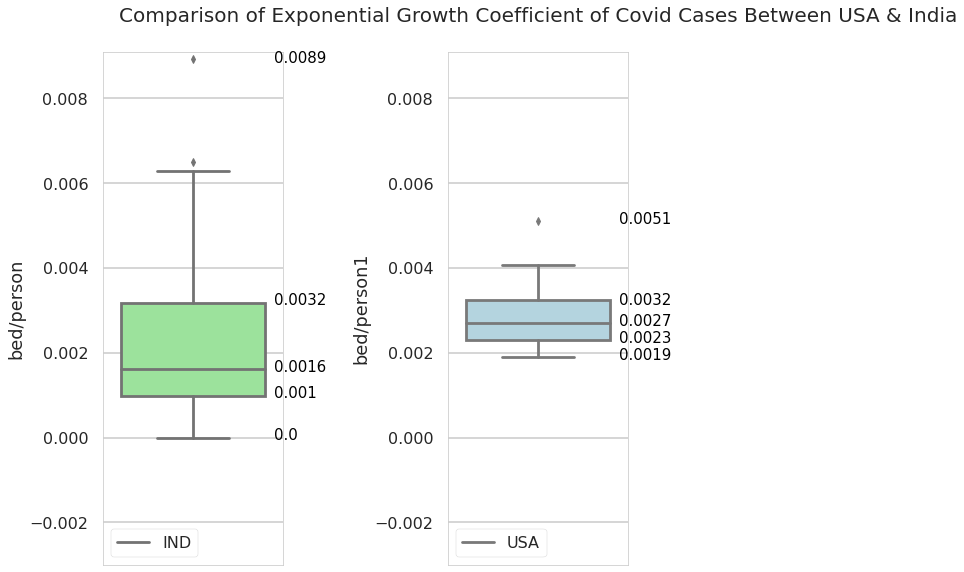

In [ ]:
# Notice both Y-axis has same scale.
import seaborn as sns
from matplotlib import rcParams
rcParams['axes.titlepad'] = 30 
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
plt.subplot(1,2,1)
g=sns.boxplot(y=ind['bed/person'],color='lightgreen')
for i, v in enumerate([min1,q1,q2,q3,min2]):
    plt.text( 0.45,v-0.000053, str(v), color='black',fontsize=15)
plt.ylim(-0.003,0.0091)
l1=plt.legend(loc='lower left',labels=['IND'])
plt.subplot(1,2,2)
g=sns.boxplot(y=us_bed['bed/person1'],color='lightblue',)
for i, v in enumerate([u1,u2,u3,u4,u5]):
    plt.text( 0.45,v-0.000053, str(v), color='black',fontsize=15)
plt.ylim((-0.003,0.0091))
plt.tight_layout(pad=3.0)
gg=plt.title('Comparison of Exponential Growth Coefficient of Covid Cases Between USA & India',fontsize=20)
l2=plt.legend(loc='lower left',labels=['USA'])

# Comparing the Recovery Rate of both Countries

Here we will compare the **weekly mean recovery rate** for all states of the two countries.  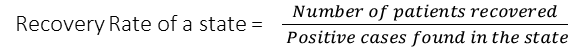

The recovery rate is calculated for each day and then aggregated weekly.

In [ ]:
import numpy as np
import pandas as pd
r=pd.read_csv('state_wise_daily.csv',parse_dates=[0])

In [ ]:
r_c=r.copy()

In [ ]:
r.drop(['TT'],axis=1,inplace=True)

In [ ]:
r_r=r[r.Status.isin(['Recovered'])]
r_r_1=r[r.Status.isin(['Confirmed'])]
r_r.head()
#r_r.drop(['TT','Status','Date'],axis=1,inplace=True)

,Date,Status,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
1,2020-03-14,Recovered,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0
4,2020-03-15,Recovered,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0
7,2020-03-16,Recovered,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,2020-03-17,Recovered,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13,2020-03-18,Recovered,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
r_r_1.head()

,Date,Status,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,2020-03-14,Confirmed,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0.0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0
3,2020-03-15,Confirmed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0.0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0
6,2020-03-16,Confirmed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,NaN,6,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
9,2020-03-17,Confirmed,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0.0,3,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1
12,2020-03-18,Confirmed,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,5,0,8,0,0.0,3,0,0,0,0,1,0,1,3,0,1,8,0,2,1,0


In [ ]:
r_r_1.fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
r_r=r_r.drop(['Date','Status'],axis=1).cumsum()
r_r['Date']=r_c['Date']
r_r_1=r_r_1.drop(['Date','Status'],axis=1).cumsum()
r_r_1['Date']=r_c['Date']

In [ ]:
r_r1=pd.melt(frame=r_r,id_vars='Date')
r_r11=pd.melt(frame=r_r_1,id_vars='Date')


In [ ]:
r_m=pd.merge(r_r1, r_r11, left_index=True, right_index=True)
r_m.head()

,Date_x,variable_x,value_x,Date_y,variable_y,value_y
0,2020-03-14,AN,0.0,2020-03-14,AN,0.0
1,2020-03-15,AN,0.0,2020-03-15,AN,0.0
2,2020-03-16,AN,0.0,2020-03-16,AN,0.0
3,2020-03-17,AN,0.0,2020-03-17,AN,0.0
4,2020-03-18,AN,0.0,2020-03-18,AN,0.0


In [ ]:
r_m['recovery_rate']=r_m['value_x']/(r_m['value_y']+1)
r_m=r_m[['Date_x','variable_x','recovery_rate']]

In [ ]:
# Get the weekly mean recovery rate data
r_m_mean=r_m.resample('W',on='Date_x')['recovery_rate'].mean().reset_index()

r_m_mean['week']=['week1','week2','week3','week4','week5','week6','week7','week8']
r_m_mean

,Date_x,recovery_rate,week
0,2020-03-15,0.031600,week1
1,2020-03-22,0.036409,week2
2,2020-03-29,0.038910,week3
3,2020-04-05,0.069605,week4
4,2020-04-12,0.137954,week5
5,2020-04-19,0.231205,week6
6,2020-04-26,0.322278,week7
7,2020-05-03,0.357647,week8


In [ ]:
import pandas as pd
r_u=pd.read_csv('states_daily_4pm.csv',parse_dates=['date'])
r_u.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-30,AK,355.0,18764.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,252.0,78605f774dcba587c8b24512354a3830ef3b5e4f,2020-04-30T20:00:00Z,9.0,NaN,19119.0,19119.0,19119.0,2,0.0,0.0,0.0,0.0,0.0
1,2020-04-30,AL,7019.0,80177.0,NaN,NaN,978.0,NaN,335.0,NaN,195.0,NaN,47546b95299bd673c18e27d5284d7ba75b362464,2020-04-30T20:00:00Z,269.0,978.0,87196.0,87196.0,87196.0,1,24.0,33.0,6570.0,177.0,6747.0
2,2020-04-30,AR,3255.0,45124.0,NaN,95.0,402.0,NaN,NaN,23.0,85.0,1305.0,8f880ed4454e1fc3bbeff4b0655314f8878cbe22,2020-04-30T20:00:00Z,61.0,402.0,48379.0,48379.0,48379.0,5,2.0,13.0,2867.0,63.0,2930.0
3,2020-04-30,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14c16072106c6d59a534dfcbd590ca14f42e4a7f,2020-04-30T20:00:00Z,0.0,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-30,AZ,7648.0,64138.0,NaN,755.0,1169.0,311.0,NaN,194.0,NaN,1499.0,eb3be7d08e6c0e46e5aa79eb92b2da29f2e6dc13,2020-04-30T20:00:00Z,320.0,1169.0,71786.0,71786.0,71786.0,4,16.0,38.0,2527.0,446.0,2973.0


In [ ]:
r_u=r_u[['date','recovered','positive']]

In [ ]:
r_u.fillna(0,inplace=True)
r_u['recovery_rate']=r_u['recovered']/(r_u['positive']+1)


In [ ]:
r_u

,date,recovered,positive,recovery_rate
0,2020-04-30,252.0,355.0,0.707865
1,2020-04-30,0.0,7019.0,0.000000
2,2020-04-30,1305.0,3255.0,0.400799
3,2020-04-30,0.0,0.0,0.000000
4,2020-04-30,1499.0,7648.0,0.195973
...,...,...,...,...
3148,2020-01-26,0.0,1.0,0.000000
3149,2020-01-25,0.0,1.0,0.000000
3150,2020-01-24,0.0,1.0,0.000000
3151,2020-01-23,0.0,1.0,0.000000


In [ ]:
r_u2=r_u[r_u['recovery_rate']>0]
r_u2

,date,recovered,positive,recovery_rate
0,2020-04-30,252.0,355.0,0.707865
2,2020-04-30,1305.0,3255.0,0.400799
4,2020-04-30,1499.0,7648.0,0.195973
6,2020-04-30,2415.0,14758.0,0.163629
8,2020-04-30,660.0,4323.0,0.152636
...,...,...,...,...
2015,2020-03-26,12.0,53.0,0.222222
2018,2020-03-25,11.0,280.0,0.039146
2039,2020-03-25,7.0,149.0,0.046667
2041,2020-03-25,122.0,287.0,0.423611


In [ ]:
m=r_u2.resample('W',on='date')['recovery_rate'].mean().reset_index()

m['week']=['week3','week4','week5','week6','week7','week8']

In [ ]:
m

,date,recovery_rate,week
0,2020-03-29,0.162406,week3
1,2020-04-05,0.185943,week4
2,2020-04-12,0.265298,week5
3,2020-04-19,0.332905,week6
4,2020-04-26,0.429076,week7
5,2020-05-03,0.437677,week8


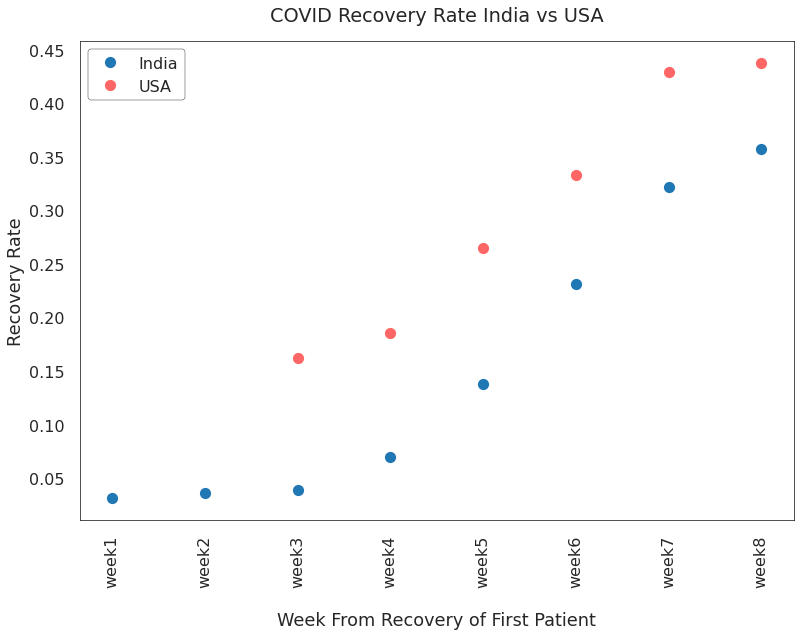

In [ ]:
# Comparing the recovery rate of both countries using dot plot
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
sns.set_style('white')
kk=plt.errorbar(r_m_mean['week'],r_m_mean['recovery_rate'],fmt='o',ecolor='blue')
kk2=plt.errorbar(m['week'],m['recovery_rate'],fmt='o',color='red',alpha=0.6)
kk1=plt.xticks(rotation=90)
k=plt.legend(loc='upper left',labels=['India','USA'],edgecolor='black')
d=plt.xlabel('Week From Recovery of First Patient',labelpad=24)
d=plt.ylabel('Recovery Rate')
d=plt.title('COVID Recovery Rate India vs USA')

# Interpretations/ Conclusion:



1. USA states have greater growth rate of covid cases than India.

2. USA records greater mobility than India which might be alarming and major reason of spread of infection.
3.India have poor health facilities compared to USA.

**More detailed interpretation in Presentation.**